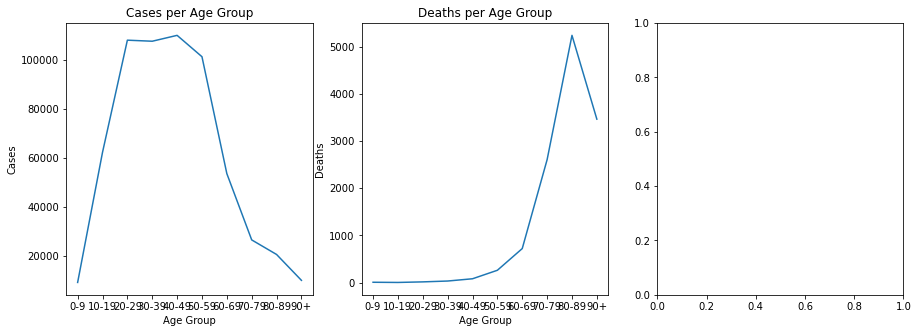

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = []
NTD_Age_List = []

NTD = pd.read_csv("National_Total_Deaths_by_Age_Group.csv", header=0)
NTD_Age_List= NTD["Age_Group"]

NTD_Cases_List = NTD["Total_Cases"]

NTD_Deaths_List = NTD["Total_Deaths"]

# for i in range(10):
#     x = ((NTD_Deaths_List[i] / NTD_Cases_List[i])*100)
#     y = 100 - x
#     abc = [x,y]
#     title = ["Dead", "Not Dead"]
#     plt.subplot(1,3,3)
#     plt.pie(abc, labels=title)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(NTD_Age_List, NTD_Cases_List)
plt.title("Cases per Age Group")
plt.ylabel("Cases")
plt.xlabel("Age Group")

plt.subplot(1,3,2)
plt.plot(NTD_Age_List, NTD_Deaths_List)
plt.title("Deaths per Age Group")
plt.ylabel("Deaths")
plt.xlabel("Age Group")

plt.subplot(1,3,3)


#print(NTD_Cases_List)
#print(NTD_Deaths_List)
#print(x)
#print(NTD_Age_List)

plt.show()


In [24]:
import pandas as pd
import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go 

NTD = pd.read_csv("National_Total_Deaths_by_Age_Group.csv", header=0) # Importerar NTD med pandas

NDD = pd.read_csv("National_Daily_Deaths.csv", header=0) # Importerar NDD med pandas


fig = make_subplots( # Skapar en subplot som gör det möjligt att ha flera grafer bredvid varann
    rows=2, cols=3, # Skapar 2 rader och 3 kolumner
    specs=[[{}, {}, {"type": "pie"}], [{"colspan": 3}, None, None]], # Specifika specificationer för subplotten
    subplot_titles=("Total Cases","Total Deaths", "Percentage of Deaths", "Deaths per day") # Namnen på Graferna!
)


fig.add_trace( # Skapar en graf i subploten
    go.Bar(x = NTD["Age_Group"], y = NTD["Total_Cases"], name="Cases"), # Skapar ett stapeldiagram med "plotly"
    row=1, col=1 # Grafen ska ligga på rad 1 column 1
)

fig.add_trace( # Skapar en graf i subploten
    go.Line(x = NTD["Age_Group"], y = NTD["Total_Deaths"], name="Deaths"), # Skapar ett linjediagram med "plotly"
    row=1, col=2 # Grafen ska ligga på rad 1 column 2
)

fig.add_trace( # Skapar en graf i subploten
    go.Pie(values=NTD["Total_Deaths"], labels=NTD["Age_Group"]), # Skapar ett cirkeldiagram med "plotly"
    row=1, col=3 # Grafen ska ligga på rad 1 column 3
)

fig.add_trace( # Skapar en graf i subploten
    go.Line(x = NDD["Date"], y = NDD["National_Daily_Deaths"], name="Deaths"), # Skapar ett linjediagram
    row=2, col=1 # Grafen ska ligga på rad 2 column 1 (pga specifkation ovan kommer den strecha hella raden)
)

fig.update_layout(
    height=800, width=1250, 
    title_text="Corona In Sweden Grafs",)

for i in range (1, 3):
    fig.update_xaxes(title_text="Age Groups", row=1, col=i)
    if i == 1:
        fig.update_yaxes(title_text="Cases", row=1, col=i)
    else:
        fig.update_yaxes(title_text="Deaths", row=1, col=i)

fig.update_xaxes(title_text="Date of Year", row=2, col=1)
fig.update_yaxes(title_text="Deaths", row=2, col=1)
    
fig.write_html("CodeShit.html", auto_open=True)
